In [8]:
import os
import nibabel as nib
from nibabel.affines import apply_affine
import numpy.linalg as npl
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import numpy as np
np.set_printoptions(precision=3, suppress=True)

#### Transformations Between Spaces

In [9]:
t2s_img = nib.load("Data/SCSeg/20/SC/t2sMerge.nii.gz")
t2s_img_data = t2s_img.get_fdata()
print(t2s_img_data.shape)

t2_img = nib.load("Data/SCSeg/20/SC/t2.nii.gz")
t2_img_data = t2_img.get_fdata()
print(t2_img_data.shape)

(516, 548, 41)
(384, 384, 15)


Text(0.5, 0.98, 'Center slices for T2 image')

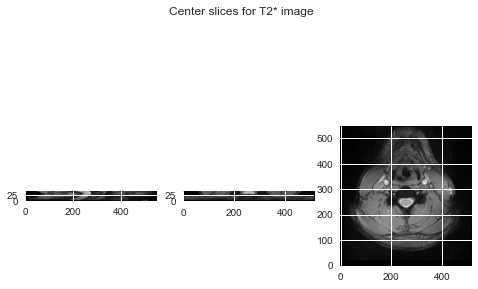

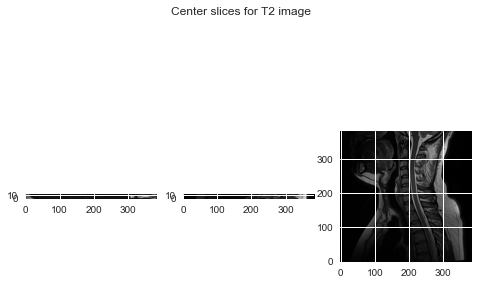

In [10]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
        
slice_0 = t2s_img_data[263, :, :]
slice_1 = t2s_img_data[:, 269, :]
slice_2 = t2s_img_data[:, :, 21]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for T2* image")  

slice_0 = t2_img_data[32, :, :]
slice_1 = t2_img_data[:, 32, :]
slice_2 = t2_img_data[:, :, 7]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for T2 image")  

In [11]:
print(t2s_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 516 548  41   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.     0.352  0.352  3.3    0.     0.     0.     0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : -4.092751e-12
quatern_c       : 0.9999939
quatern_d       : 0.0034807287
qoffset_x       : 93.9428
qoffset_y       : -116.35256
qoffset_

In [12]:
# Print the affine
print(t2s_img.affine)
print(t2_img.affine)

[[  -0.352   -0.      -0.001   93.943]
 [   0.       0.352   -0.023 -116.353]
 [  -0.       0.002    3.3    -96.313]
 [   0.       0.       0.       1.   ]]
[[   0.002   -0.014    2.749  -12.761]
 [  -0.677    0.018    0.008  109.289]
 [   0.018    0.677    0.057 -193.103]
 [   0.       0.       0.       1.   ]]


In [13]:
t2_vox2t2s_vox = npl.inv(t2s_img.affine).dot(t2_img.affine)
t2_vox2t2s_vox.shape

(4, 4)

#### Summarising Data

In [14]:
root_dir = "Data/SCSeg/"
data_shapes = {}

print('Lesion Voxel Counts', '-'*20)
for root, dir, files in os.walk(root_dir):
    if len(files)>0:
        data_shapes[root] = {}
        print('Subject', root[11:13])
        for file in files:
            img = nib.load(root + '/' + file)
            img_data = img.get_fdata()
            data_shapes[root][file] = img_data.shape

            if file=='labelLesion.nii.gz':
                unique_vals, counts = np.unique(img_data.ravel(), return_counts=True)
                print(np.asarray((unique_vals, counts, np.round(100*counts/sum(counts), 6))).T)

Lesion Voxel Counts --------------------
Subject C
[[       0.    12214149.          99.999]
 [       1.         130.           0.001]]
Subject SC
[[       0.    12461102.          99.997]
 [       1.         210.           0.002]
 [       2.         104.           0.001]]
Subject SC
[[       0. 13328700.      100.]]
Subject SC
[[       0.    12100105.          99.985]
 [       1.        1257.           0.01 ]
 [       2.         529.           0.004]
 [       3.          45.           0.   ]]
Subject SC
[[       0.    11510217.          99.993]
 [       1.         445.           0.004]
 [       2.         196.           0.002]
 [       3.         138.           0.001]]
Subject SC
[[       0.    10834997.          99.991]
 [       1.         366.           0.003]
 [       2.         233.           0.002]
 [       3.         203.           0.002]
 [       4.         201.           0.002]]
Subject SC
[[       0. 12237456.      100.]]
Subject SC
[[       0.    12465288.          99.995]
 

Subject SC
[[      0.    2984498.         99.981]
 [      1.        278.          0.009]
 [      2.         99.          0.003]
 [      3.         60.          0.002]
 [      4.         40.          0.001]
 [      5.         37.          0.001]
 [      6.         31.          0.001]
 [      7.         17.          0.001]]
Subject SC
[[      0.    3005845.         99.979]
 [      1.        278.          0.009]
 [      2.         94.          0.003]
 [      3.         83.          0.003]
 [      4.         74.          0.002]
 [      5.         37.          0.001]
 [      6.         32.          0.001]
 [      7.         31.          0.001]]
Subject SC
[[      0.    3336504.         99.996]
 [      1.        120.          0.004]]
Subject SC
[[      0.    3016180.         99.998]
 [      1.         50.          0.002]]
Subject SC
[[      0.    3029628.         99.981]
 [      1.        145.          0.005]
 [      2.        127.          0.004]
 [      3.        112.          0.004]
 [   

In [15]:
data_shapes

{'Data/SCSeg/1\\SC': {'labelLesion.nii.gz': (527, 539, 43),
  't2.nii.gz': (64, 64, 15),
  't2sMerge.nii.gz': (527, 539, 43),
  't2sMerge_seg.nii.gz': (527, 539, 43)},
 'Data/SCSeg/10\\SC': {'labelLesion.nii.gz': (514, 551, 44),
  't2.nii.gz': (384, 384, 15),
  't2sMerge.nii.gz': (514, 551, 44)},
 'Data/SCSeg/11\\SC': {'labelLesion.nii.gz': (525, 577, 44),
  't2.nii.gz': (384, 384, 13),
  't2sMerge.nii.gz': (525, 577, 44)},
 'Data/SCSeg/12\\SC': {'labelLesion.nii.gz': (517, 532, 44),
  't2.nii.gz': (384, 384, 15),
  't2sMerge.nii.gz': (517, 532, 44)},
 'Data/SCSeg/13\\SC': {'labelLesion.nii.gz': (518, 542, 41),
  't2.nii.gz': (384, 384, 15),
  't2sMerge.nii.gz': (518, 542, 41)},
 'Data/SCSeg/14\\SC': {'labelLesion.nii.gz': (516, 525, 40),
  't2.nii.gz': (384, 384, 15),
  't2sMerge.nii.gz': (516, 525, 40)},
 'Data/SCSeg/15\\SC': {'labelLesion.nii.gz': (516, 539, 44),
  't2.nii.gz': (384, 384, 15),
  't2sMerge.nii.gz': (516, 539, 44)},
 'Data/SCSeg/16\\SC': {'labelLesion.nii.gz': (517, 5

In [18]:
for subj in data_shapes:
    if data_shapes[subj]['t2.nii.gz'] != (384, 384, 15):
        print(subj, data_shapes[subj]['t2.nii.gz'])
    

Data/SCSeg/1\SC (64, 64, 15)
Data/SCSeg/11\SC (384, 384, 13)
Data/SCSeg/2\SC (64, 64, 15)
Data/SCSeg/3\SC (64, 64, 15)
Data/SCSeg/38\SC (384, 384, 18)
Data/SCSeg/4\SC (64, 64, 15)
Data/SCSeg/42\SC (384, 384, 14)
Data/SCSeg/43\SC (384, 384, 14)


(array([11282681.,  1503493.,   407557.,    49284.,    17987.,     1790.,
             440.,      133.,       17.,        8.]),
 array([   0. ,  206.3,  412.6,  618.9,  825.2, 1031.5, 1237.8, 1444.1,
        1650.4, 1856.7, 2063. ]),
 <BarContainer object of 10 artists>)

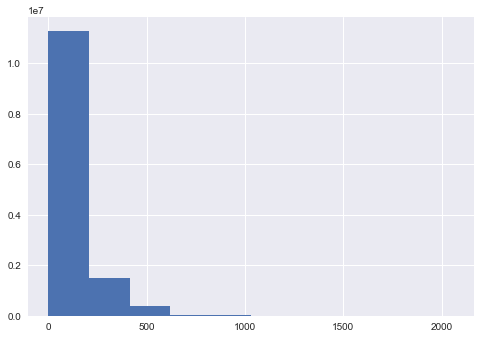

In [20]:
plt.hist(img_data.ravel()) # (Just the last subject for now - T2*)